# Import Patch Version of Sklearn

In [ ]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 10.5 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Preprocessing (EXP1)

### Load data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
plane = pd.read_csv('planes.csv')
iris = pd.read_csv('Iris_Data.csv')

In [ ]:
plane.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1523,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,02:15,12:35,10h 20m,1 stop,No info,18371.0
3231,Air India,18/06/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,5510.0
1026,Jet Airways,15/05/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,In-flight meal not included,2228.0
3574,SpiceJet,24/06/2019,Mumbai,Hyderabad,BOM → HYD,13:15,14:45,1h 30m,non-stop,No info,2017.0
9973,SpiceJet,1/05/2019,Mumbai,Hyderabad,BOM → HYD,13:15,14:45,1h 30m,non-stop,No check-in baggage included,2385.0


### EDA

In [ ]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [ ]:
plane.shape

(10660, 11)

In [ ]:
plane.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Check For Null values

In [ ]:
plane.isnull().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris = iris.dropna() # Deletes Null values

### Unique Datatypes

In [ ]:
plane.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
plane['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'SpiceJet', 'Multiple carriers',
       'Air India', 'GoAir', 'Vistara', nan, 'Air Asia'], dtype=object)

Convert Object into Datetime format

In [ ]:
plane['Dep_Time'] = pd.to_datetime(plane['Dep_Time'])

<ipython-input-28-286393399a5d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plane['Dep_Time'] = pd.to_datetime(plane['Dep_Time'])


In [ ]:
plane['Arrival_Time'] = pd.to_datetime(plane['Arrival_Time'])

<ipython-input-30-eb785d57f702>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plane['Arrival_Time'] = pd.to_datetime(plane['Arrival_Time'])


### Simple Data Cleaning

In [ ]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica


In [ ]:
iris['species'] = iris['species'].str.removeprefix('Iris-') # Can do with sufix
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
3,4.6,3.1,1.5,0.2,setosa
135,7.7,3.0,6.1,2.3,virginica
123,6.3,2.7,4.9,1.8,virginica
90,5.5,2.6,4.4,1.2,versicolor


### More EDA

In [ ]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.groupby(['species']).mean() # Can do median,mode as well

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Graphs

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

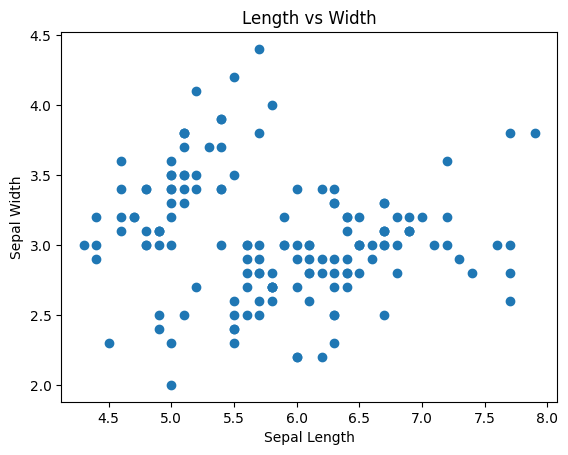

In [ ]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Length vs Width")

plt.show()

### PairPlot with seaborn

In [ ]:
import seaborn as sns

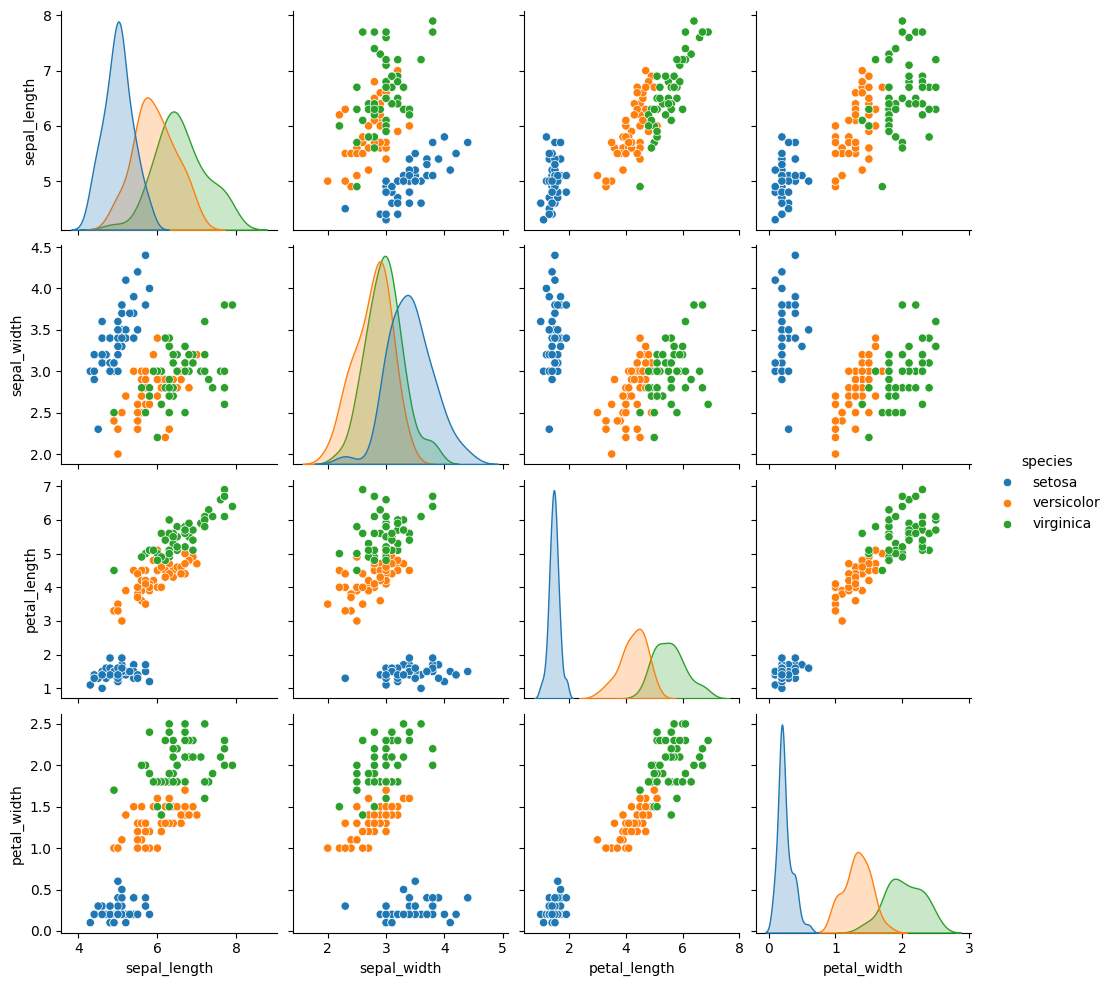

In [ ]:
sns.pairplot(iris, hue='species')

# Supervised Learning --> KNN (EXP2)

### Load Data & EDA

In [ ]:
tele = pd.read_csv('Orange_Telecom_Churn_Data.csv')
tele.sample(5)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
309,SD,209,415,413-5310,no,no,0,227.2,128,38.62,...,92,21.96,183.5,74,8.26,8.9,4,2.40,3,False
2895,AR,33,415,411-8956,yes,no,0,164.0,99,27.88,...,102,13.01,123.8,104,5.57,6.4,4,1.73,0,False
2004,CA,77,510,335-2261,no,no,0,175.5,86,29.84,...,78,17.43,245.2,100,11.03,17.8,3,4.81,4,False
2093,WA,106,408,416-4464,no,no,0,193.6,66,32.91,...,82,20.25,176.4,107,7.94,12.9,3,3.48,0,False
4017,MD,105,408,343-6686,no,no,0,141.8,85,24.11,...,101,16.26,133.6,126,6.01,10.9,3,2.94,1,False


In [ ]:
tele.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

Delete Columns

In [ ]:
columns_to_drop = ['state', 'area_code', 'phone_number']
tele = tele.drop(columns=columns_to_drop)

In [ ]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   intl_plan                      5000 non-null   object 
 2   voice_mail_plan                5000 non-null   object 
 3   number_vmail_messages          5000 non-null   int64  
 4   total_day_minutes              5000 non-null   float64
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_minutes              5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   float64
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_night_charge             5000 non-null   f

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
categorical_columns = ['intl_plan', 'voice_mail_plan', 'churned']
for column in categorical_columns:
    tele[column] = lb.fit_transform(tele[column])

In [ ]:
tele.sample(5)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
2110,102,0,1,25,137.4,100,23.36,176.7,83,15.02,188.2,93,8.47,10.2,6,2.75,2,0
1085,60,0,0,0,252.7,97,42.96,221.1,121,18.79,109.9,100,4.95,12.4,4,3.35,2,0
882,130,0,0,0,162.8,113,27.68,290.3,111,24.68,114.9,140,5.17,7.2,3,1.94,1,0
2289,98,1,1,23,245.5,54,41.74,292.7,83,24.88,184.0,90,8.28,10.8,7,2.92,1,0
3706,58,0,0,0,177.4,107,30.16,204.7,104,17.40,141.9,123,6.39,15.0,9,4.05,3,0


### Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_features = scaler.fit_transform(tele.drop(columns=['churned'])) # Removes churned and passes the df to the scaler

scaled_tele = pd.DataFrame(scaled_features, columns=tele.columns[:-1])  # Exclude the final output variable i.e churned and make a Dataframe
scaled_tele['churned'] = tele['churned'] # Adds churned back to the df

In [ ]:
scaled_tele.sample(5)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
3997,0.276860,0.0,0.0,0.000000,0.403698,0.678788,0.403614,0.456970,0.552941,0.457134,0.565823,0.440000,0.566123,0.460,0.30,0.459259,0.111111,0
2538,0.136364,0.0,0.0,0.000000,0.366430,0.484848,0.366466,0.573825,0.547059,0.573924,0.511646,0.588571,0.511536,0.700,0.35,0.700000,0.111111,0
4715,0.206612,0.0,1.0,0.615385,0.586344,0.812121,0.586345,0.493814,0.494118,0.494015,0.841013,0.514286,0.841306,0.510,0.10,0.509259,0.333333,0
2635,0.309917,0.0,0.0,0.000000,0.471408,0.569697,0.471386,0.707726,0.470588,0.707862,0.432405,0.651429,0.432752,0.500,0.20,0.500000,0.111111,0
3933,0.747934,0.0,1.0,0.461538,0.612233,0.442424,0.612115,0.365961,0.500000,0.365901,0.519241,0.451429,0.519415,0.545,0.35,0.544444,0.000000,0


### KNN

In [ ]:
X = scaled_tele.drop(columns=['churned'])
y = scaled_tele['churned']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X, y)

y_pred = knn.predict(X)

In [ ]:
predicted_tele = pd.DataFrame({'Actual Churned': y, 'Predicted Churned': y_pred})
print("\nPredicted outcomes on the same data:")
predicted_tele.sample(10)


Predicted outcomes on the same data:


,Actual Churned,Predicted Churned
3469,0,0
4856,1,0
516,0,0
4898,1,1
327,0,0
2028,1,1
4588,0,0
930,0,0
491,1,1
2601,0,0


### Accuracy Function

In [ ]:
def calculate_accuracy(actual, predicted):

    correct_predictions = np.sum(actual == predicted) # Counts correct number of predictions
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions

    return accuracy

In [ ]:
accuracy = calculate_accuracy(y, y_pred)

print(f"\nAccuracy of the K-nearest neighbors model: {accuracy:.2%}")


Accuracy of the K-nearest neighbors model: 94.22%


### KNN with Distance Metic and Manhattan Distance

In [ ]:
knn_distance_model = KNeighborsClassifier(n_neighbors=3, weights='distance') # The defualt uses 'uniform' weights
knn_distance_model.fit(X, y)

y_pred_distance = knn_distance_model.predict(X)

accuracy_distance = calculate_accuracy(y, y_pred_distance)
print(f"\nAccuracy with distance weights: {accuracy_distance:.2%}")


Accuracy with distance weights: 96.48%


In [ ]:
knn_uniform_manhattan_model = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1) # p=2 is default i.e Euclidean distance
knn_uniform_manhattan_model.fit(X, y)
y_pred_uniform_manhattan = knn_uniform_manhattan_model.predict(X)

accuracy_uniform_manhattan = calculate_accuracy(y, y_pred_uniform_manhattan)
print(f"Accuracy with uniform weights and Manhattan distance: {accuracy_uniform_manhattan:.2%}")

#Also with this model if you change the weights to distance we get 100% accuracy

Accuracy with uniform weights and Manhattan distance: 94.56%


### Plot KNN on 'k' vs 'accurancy'

In [ ]:
accuracy_list = []
k_values = list(range(1, 21))

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)
    y_pred_k = knn_model.predict(X)
    accuracy_k = calculate_accuracy(y, y_pred_k)
    accuracy_list.append(accuracy_k)

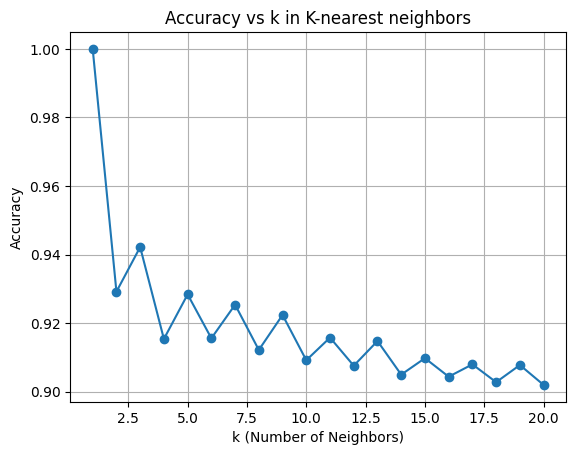

In [ ]:
plt.plot(k_values, accuracy_list, marker='o')
plt.title('Accuracy vs k in K-nearest neighbors')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Train-Test Split, OneHotEncoder, Linear Regression (EXP3)

### Load dataset and EDA

In [ ]:
house = pd.read_csv('Ames_Housing_Sales.csv')
house.sample(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0
803,918.0,728.0,0.0,NaN,4,1Fam,TA,No,364.0,0.0,...,126.0,Pave,7,918.0,AllPub,0.0,1941,1950,2007,164000.0
1210,1339.0,0.0,0.0,NaN,2,1Fam,TA,No,1053.0,0.0,...,90.0,Pave,6,1309.0,AllPub,0.0,1990,1990,2006,180000.0
1092,1314.0,0.0,0.0,NaN,2,Twnhs,TA,No,904.0,0.0,...,0.0,Pave,6,1314.0,AllPub,172.0,2007,2008,2009,230000.0
279,1152.0,0.0,0.0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,6,1092.0,AllPub,0.0,1950,2004,2009,158500.0


In [ ]:
house.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           1297
BedroomAbvGr       0
                ... 
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
SalePrice          0
Length: 80, dtype: int64

### OneHotEncoder & LabelEncoder

Check for all dtype i.e objects

In [ ]:
cat_columns = house.columns[house.dtypes == 'object']
house[cat_columns].sample(5)

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
1209,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
968,NaN,1Fam,TA,No,Rec,Unf,TA,Y,Feedr,Norm,...,NaN,NAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1351,NaN,1Fam,TA,No,BLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NWAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
788,Pave,1Fam,TA,No,Rec,Unf,TA,Y,Norm,Norm,...,NaN,OldTown,Y,NaN,CompShg,Gable,Normal,COD,Pave,AllPub
371,NaN,1Fam,TA,Av,BLQ,Unf,TA,Y,Norm,Norm,...,NaN,Edwards,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


Check how many extra rows would be created if OneHotEncodding is done

Number of one-hot columns is one less than the number of categories

In [ ]:
num = 0
for col in cat_columns:
  if house[col].nunique() != 1:
    num = num + house[col].nunique() - 1  # nunique gives you number of unique values in a single column
print("Number of extra columns: ",num)

Number of extra columns:  204


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder()
le = LabelEncoder()

In [ ]:
nhouse = house.copy() # Copy the values of house into nhouse

In [ ]:
# Not imp we can use 'cat_columns' instead of 'ohe_columns'
ohe_columns = house[cat_columns].apply(lambda x: x.nunique()).sort_values(ascending=False)

In [ ]:
for col in ohe_columns.index:  # If you dont want to complicate stuff just use 'cat_columns' instead of 'ohe_columns'

    # Integer encode the string categories
    int_enc = le.fit_transform(nhouse[col]).astype(int)

    # Remove the original column from the dataframe
    nhouse = nhouse.drop(col,axis=1)

    # One hot encode the data--this returns a sparse array
    new_data = ohe.fit_transform(int_enc.reshape(-1,1))

    # Create unique column names
    n_cols = new_data.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_data.toarray(),index=nhouse.index,columns=col_names)

    # Append the new data to the dataframe
    nhouse = pd.concat([nhouse, new_df], axis=1)

In [ ]:
# Column difference is as calculated above
print("No. of columns in ohc data:",nhouse.shape[1])
print("No. of columns in original dataset:",house.shape[1])
print("Difference:",nhouse.shape[1] - house.shape[1])

No. of columns in ohc data: 295
No. of columns in original dataset: 80
Difference: 215


Make another df with just numerical data

In [ ]:
# Remove the string columns from the dataframe
no_str_house = house.drop(ohe_columns.index, axis = 1)

#print shape of
no_str_house.shape[1]

37

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_data = no_str_house[no_str_house.columns[no_str_house.columns != 'SalePrice']]
y_data = no_str_house['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=93)

In [ ]:
X_data_ohe = nhouse[nhouse.columns[nhouse.columns != 'SalePrice']]
y_data_ohe = nhouse['SalePrice']

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_data_ohe, y_data_ohe,test_size=0.3, random_state=93)

### Linear Reg

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.metrics import mean_squared_error

In [ ]:
errors_house = list()  # Storage for error values

# Data that have not been one-hot encoded
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
errors_house.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),'test' : mean_squared_error(y_test,  y_test_pred)},name='No ohe'))

# Data that have been one-hot encoded
lr.fit(X_train_ohe, y_train_ohe)
y_train_ohe_pred = lr.predict(X_train_ohe)
y_test_ohe_pred = lr.predict(X_test_ohe)
errors_house.append(pd.Series({'train': mean_squared_error(y_train_ohe, y_train_ohe_pred),'test' : mean_squared_error(y_test_ohe,  y_test_ohe_pred)},name='Ohe'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Assemble the results
errors_df = pd.concat(errors_house, axis=1)
errors_df

,No ohe,Ohe
train,9.821109e+08,3.980413e+08
test,2.176958e+09,1.726616e+19


### Scale Non-OHE columns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
scaler = StandardScaler()

In [ ]:
training_test_sets = {'Not_encoded': (X_train, y_train, X_test, y_test),'One_hot_encoded': (X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)}

float_columns = X_train.columns[X_train.dtypes == float]

LR = LinearRegression()

errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():

    trainingset = _X_train.copy()
    testset = _X_test.copy()

    trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
    testset[float_columns] = scaler.transform(testset[float_columns])

    LR.fit(trainingset, _y_train)
    predictions = LR.predict(testset)

    key = encoding_label + ' - standard scaling'
    errors[key] = mean_squared_error(_y_test, predictions)

print("Mean Sqr Error :-")
errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

Mean Sqr Error :-
Not_encoded - standard scaling        2.176958e+09
One_hot_encoded - standard scaling    1.916152e+09
--------------------------------------------------------------------------------
Not_encoded - standard scaling 2176957718.9636087
One_hot_encoded - standard scaling 1916152191.810765


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Plot Linear Reg

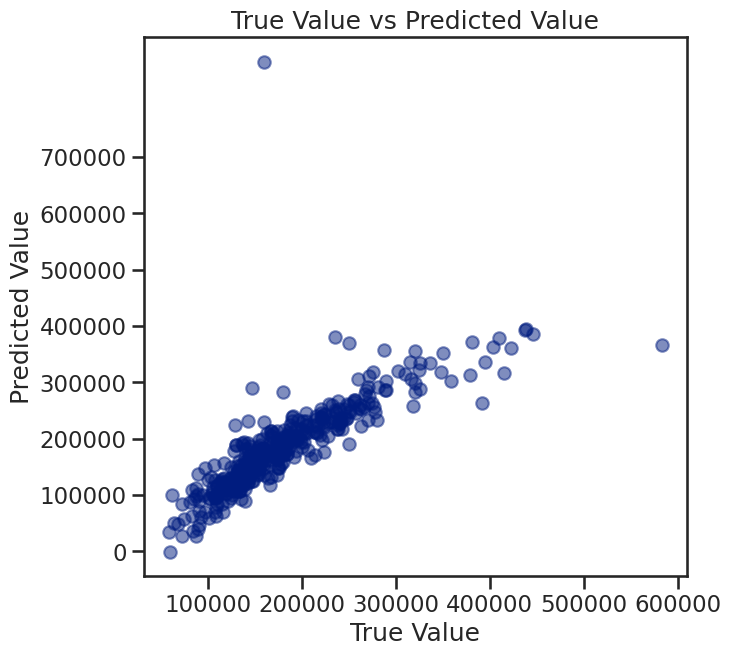

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.figure(figsize=(7,7))

ax = plt.axes()

ax.scatter(y_test, y_test_pred, alpha=0.5)

ax.set(xlabel='True Value', ylabel='Predicted Value', title='True Value vs Predicted Value');

xticks = ax.get_xticks()
ax.set_yticks(xticks);

# Regularization and ColumnTransformer (EXP4)

### Load Data

In [ ]:
sinu = pd.read_csv('X_Y_Sinusoid_Data.csv')
sinu.sample(5)

,x,y
3,0.187359,1.004781
13,0.638054,-1.128250
11,0.491929,-0.393222
19,0.950964,-0.025815
12,0.614932,-0.912892


### Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

### PipeLine, Lasso Reg & Ridge Reg

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Ridge Regression
ridge_alpha = 0.001
ridge = Ridge(alpha=ridge_alpha)
ridge_pipe = make_pipeline(pf, ridge)
ridge_pipe.fit(sinu[['x']], sinu['y'])

# Lasso Regression
lasso_alpha = 0.0001
lasso = Lasso(alpha=lasso_alpha)
lasso_pipe = make_pipeline(pf, lasso)
lasso_pipe.fit(sinu[['x']], sinu['y'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('lasso', Lasso(alpha=0.0001))])

### Plotting

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


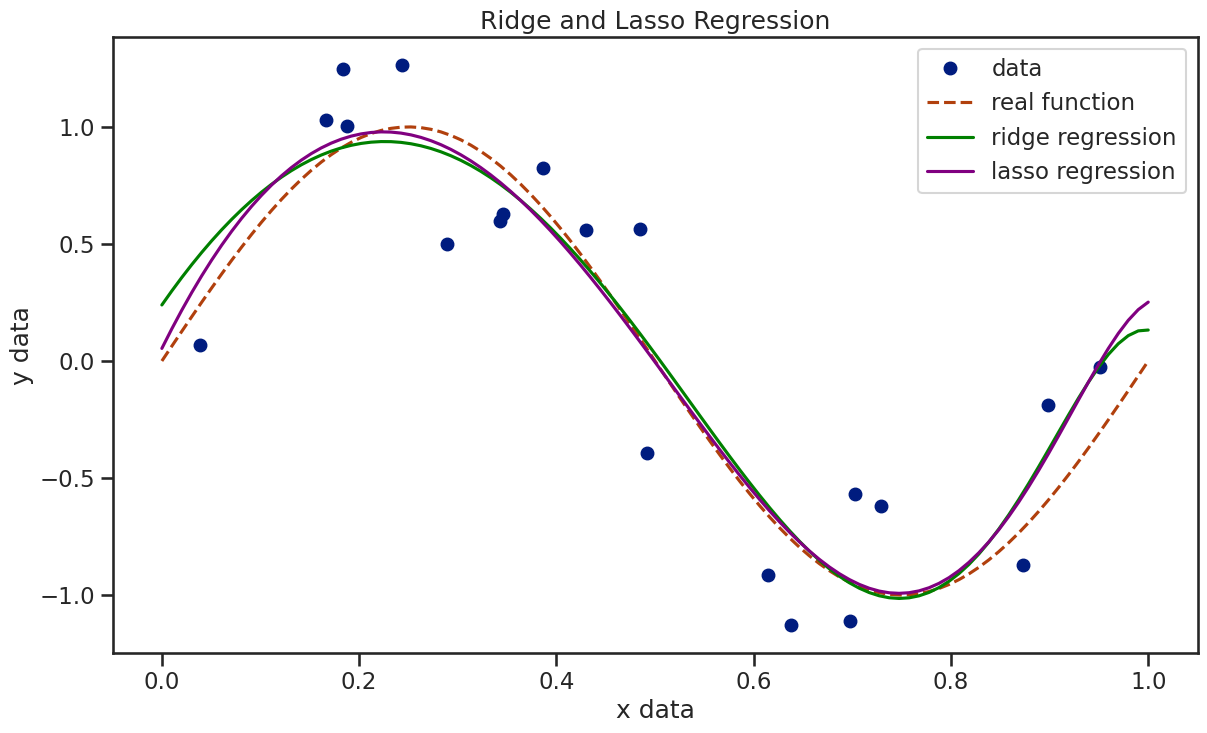

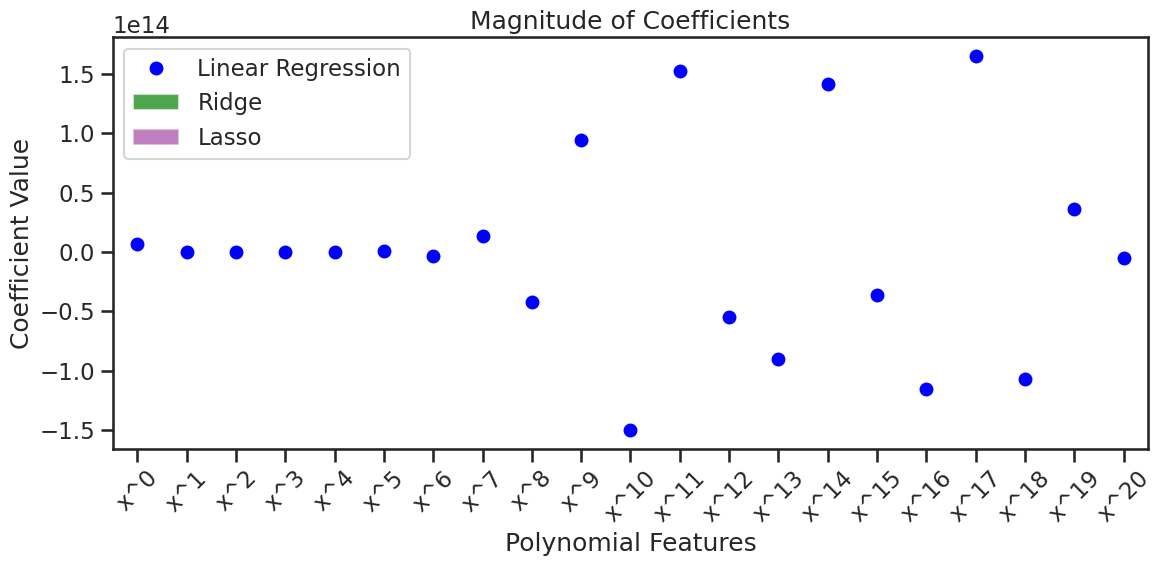

In [ ]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

plt.figure(figsize=(14, 8))

# Plot data points and real function
ax = sinu.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

# Plot ridge regression results
ax.plot(X_real, ridge_pipe.predict(X_real.reshape(-1, 1)), color='green', label='ridge regression')

# Plot lasso regression results
ax.plot(X_real, lasso_pipe.predict(X_real.reshape(-1, 1)), color='purple', label='lasso regression')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')
ax.set_title('Ridge and Lasso Regression')

# Plotting magnitude of coefficients
plt.figure(figsize=(12, 6))

# Get polynomial feature names
poly_features = pf.fit_transform(sinu[['x']])
poly_feature_names = [f'x^{i}' for i in range(poly_features.shape[1])]

# Ridge coefficients
ridge_coefs = pd.Series(ridge_pipe.named_steps['ridge'].coef_, index=poly_feature_names)
ridge_coefs.plot.bar(color='green', alpha=0.7, label='Ridge', legend=True)

# Lasso coefficients
lasso_coefs = pd.Series(lasso_pipe.named_steps['lasso'].coef_, index=poly_feature_names)
lasso_coefs.plot.bar(color='purple', alpha=0.5, label='Lasso', legend=True)

# Linear regression coefficients
lr.fit(pf.fit_transform(sinu[['x']]), sinu['y'])
lr_coefs = pd.Series(lr.coef_, index=poly_feature_names)
lr_coefs.plot(color='blue', marker='o', linestyle='None', label='Linear Regression', legend=True)

plt.title('Magnitude of Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Polynomial Features')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

### Column Transformer

In [ ]:
house = pd.read_csv('Ames_Housing_Sales.csv')

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
house = house.drop(columns=['Alley'])
cat_columns = house.columns[house.dtypes == 'object']

In [ ]:
# One-hot encode categorical features
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), cat_columns)
    ], remainder='passthrough')

In [ ]:
# Separate features (X) and target variable (y)
X = house.drop(columns=['SalePrice'])
y = house['SalePrice']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
ct.fit_transform(X_test)

array([[   0.,    0.,    0., ..., 2003., 2004., 2008.],
       [   0.,    0.,    0., ..., 1965., 1965., 2009.],
       [   0.,    0.,    0., ..., 1900., 1950., 2006.],
       ...,
       [   0.,    0.,    0., ..., 1988., 1988., 2009.],
       [   0.,    0.,    0., ..., 1965., 1965., 2007.],
       [   0.,    0.,    0., ..., 1941., 1960., 2009.]])

One more eg:-

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ct = ColumnTransformer(
#     [('standard', StandardScaler(), numerical_features)]
# )

# X = ct.fit_transform(df)

# print(X)

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# lr = LinearRegression()

# model = Pipeline([
#     ('preprocessor', ct),
#     ('linear_regression', lr)
# ])

# X = df[numerical_features]
# y = df['happiness_score']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_train)

# print(y_pred)

# Logistic Reg & Metrics (EXP5)

### Load Dataset

In [ ]:
human = pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv')
human.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
4031,0.277961,-0.015224,-0.108238,-0.997418,-0.987973,-0.989433,-0.997852,-0.986816,-0.990913,-0.939831,...,-0.330441,-0.624846,-0.030316,-0.529062,-0.251492,-0.227156,-0.751581,0.105999,0.197903,SITTING
180,0.272397,-0.023659,-0.113242,-0.990291,-0.916346,-0.976980,-0.990909,-0.911919,-0.976346,-0.934611,...,-0.201062,-0.583513,0.005211,-0.095086,-0.050689,-0.004716,-0.692017,0.310905,0.014964,STANDING
9382,0.305048,-0.036708,-0.083028,-0.350077,-0.312240,-0.269419,-0.404706,-0.307315,-0.212033,-0.138514,...,-0.565783,-0.863505,-0.423193,0.599536,-0.921280,-0.045415,-0.705527,0.293467,-0.040070,WALKING_UPSTAIRS
6072,0.277642,-0.016896,-0.097383,-0.997833,-0.991769,-0.977154,-0.998346,-0.991104,-0.975924,-0.937662,...,-0.548394,-0.829599,0.028632,-0.344557,-0.169106,0.194302,-0.814381,0.224443,0.041258,STANDING
5241,0.293674,0.018849,-0.171137,-0.438640,-0.279056,-0.421610,-0.543448,-0.274581,-0.430956,-0.209235,...,-0.055582,-0.360726,0.109305,0.125220,0.844045,0.679326,-0.720281,0.227577,-0.130437,WALKING_UPSTAIRS


### StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

### Logistic Reg

In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(C=.001, max_iter=295).fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
# Fitting logistic regression models with different solvers
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
for solver in solvers:
    lr_solver = LogisticRegression(C=0.001, max_iter=1000, solver=solver, multi_class='auto').fit(X_train, y_train)
    train_accuracy = lr_solver.score(X_train, y_train)
    test_accuracy = lr_solver.score(X_test, y_test)
    print(f'Solver: {solver}, Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=1, cv=4, penalty='l2').fit(X_train, y_train)

### Metrics

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [ ]:

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()

### Imputer

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

df.head()

# SVM and Kernels (EXP6)